# Bisección de Grafos con Algoritmo Genético

**Integrantes:**

- Ricardo Ballesteros Amavizca - A01255358
- Jesús Emilio Medina García - A00839492


## Descripción del Problema


Se requiere particionar un grafo de **16 nodos** en dos subconjuntos de **8 nodos cada uno**, minimizando el número de aristas que cruzan entre ambos subconjuntos (aristas de corte).

### Grafo de Entrada
- **Número de nodos:** 16
- **Número de aristas:** 28
- **Edges:** 
    ```
    (1,2), (1,9), (1,14),
    (2,3), (2,5),
    (3,4), (3,5), (3,6), (3,7),
    (4,6),
    (5,7), (5,9), (5,10),
    (6,7), (6,8),
    (7,8), (7,11),
    (8,11),
    (9,10), (9,13), (9,14),
    (10,11), (10,12),
    (12,16),
    (13,15), (13,16),
    (14,15),
    (15,16)
    ```

### Objetivo
Encontrar una partición $S \cup \bar{S}$ con $|S| = |\bar{S}| = 8$ que minimize el número de aristas $(u,v)$ tales que $u \in S$ y $v \in \bar{S}$.

## Planeamiento



### Requisitos
- **Entrada:** Grafo con 16 nodos no dirigidos, 28 aristas sin pesos (iguales a 1).
- **Salida:** Partición (S, V\S) con |S| = 8 y |V\S| = 8 que minimiza cut(S).
- **Restricción principal:** Balance cardinal estricto: exactamente 8 nodos en cada lado.
- **Métrica de éxito:** Minimizar el número de aristas que cruzan el corte (idealmente < 5).

### Desafíos
- Espacio de soluciones: C(16,8) ≈ 12,870 posibles particiones.
- Complejidad: Problema NP-difícil; búsqueda exhaustiva no es práctica.
- Balance: Mantener la restricción de 8+8 durante la evolución.

### Estrategia
1. Usar cromosomas binarios de tamaño 16 con suma fija = 8.
2. Operadores especializados (swap) para preservar balance.
3. Reparación post-cruce si es necesario.
4. Elitismo para no perder buenas soluciones.

## Teoría



### Definición Formal
Dado un grafo no dirigido $G = (V, E)$ con $|V| = 16$ y $|E| = 28$, se busca encontrar una partición de $V$ en dos subconjuntos disjuntos $S$ y $\bar{S}$ tales que:
- $S \cap \bar{S} = \emptyset$
- $S \cup \bar{S} = V$
- $|S| = |\bar{S}| = 8$

que minimice la función objetivo:
$$\text{cut}(S) = |\{(u,v) \in E : u \in S, v \in \bar{S}\}|$$

### Complejidad
- El problema es **NP-completo** (Garey-Johnson, 1979).
- El espacio de búsqueda es de tamaño $\binom{16}{8} = 12,870$, manejable pero prohibitivo para búsqueda exacta en problemas mayores.
- No existen algoritmos polinómicos conocidos para encontrar la solución óptima en general.

### Enfoques de Solución
1. **Búsqueda Exhaustiva:** Enumerar todas las particiones (viable para 16 nodos, pero no escalable).
2. **Algoritmos Exactos:** Programación dinámica, branch-and-bound (costosos en memoria/tiempo).
3. **Heurísticas:** Kernighan–Lin, greedy (rápidas pero sin garantía de optimalidad).
4. **Metaheurísticas:** Simulated Annealing, Tabú Search, **Algoritmos Genéticos** (buen balance velocidad-calidad).

### Por qué Algoritmo Genético
- Explora el espacio de forma paralela y no determinista.
- Adapta operadores (swap, cruce, mutación) al problema de balance cardinal.
- Evita óptimos locales mediante diversidad poblacional.
- Converge rápidamente en 50–200 generaciones para este tamaño.

## Diseño



### 1. Representación de Cromosomas
- **Tipo:** Vector binario de longitud 16.
- **Interpretación:** Posición $i$ = 0 significa nodo $i$ en grupo $A$ (subset $S$); posición $i$ = 1 significa nodo $i$ en grupo $B$ (subset $\bar{S}$).
- **Restricción invariante:** $\sum_{i=0}^{15} x_i = 8$ (exactamente 8 unos).

### 2. Población Inicial
- Generar `pop_size` individuos (ej., 50–100).
- Cada individuo: crear vector de 8 ceros y 8 unos, barajar aleatoriamente.
- Garantiza balance desde el inicio.

### 3. Función de Fitness
Para un cromosoma $x$ (partición $S$):
$$\text{fitness}(x) = \text{cut}(S) = \text{(número de aristas que cruzan el corte)}$$
**Objetivo:** Minimizar fitness.

Cálculo eficiente:
- Para cada nodo $i$, precomputar su lista de vecinos.
- Evaluar: $\text{cut}(S) = \sum_{i \in S} |\{v \in \bar{S} : (i,v) \in E\}|$.

### 4. Selección
- **Método:** Torneo binario (seleccionar 2 individuos al azar, elegir el mejor).
- Variante: Selección proporcional al inverso del fitness (p. ej., $1/\text{cut}$).

### 5. Cruce (Recombinación)
- **Tipo:** Cruce uniforme con reparación de balance.
- **Procedimiento:**
  1. Para cada posición $i$, con probabilidad 0.5, heredar alelo de padre1; si no, de padre2.
  2. Contar unos en el hijo resultante: sea $c$ el conteo.
  3. **Reparación:** Si $c > 8$, cambiar aleatoriamente $(c-8)$ unos a ceros; si $c < 8$, cambiar aleatoriamente $(8-c)$ ceros a unos.

### 6. Mutación
- **Tipo:** Mutación por Swap (preserva balance automáticamente).
- **Procedimiento:**
  1. Seleccionar dos índices al azar: $i$ con $x_i = 0$ y $j$ con $x_j = 1$.
  2. Intercambiar sus valores: $x_i \leftarrow 1$, $x_j \leftarrow 0$.
  3. Restaura balance (suma sigue siendo 8).
- **Tasa:** $p_m = 0.1$ a $0.2$ (probabilidad de aplicar mutación por individuo).

### 7. Reemplazo
- **Estrategia:** Elitismo + reemplazo generacional.
- Copiar el mejor individuo a la siguiente generación.
- Generar el resto de la población mediante selección/cruce/mutación.

### 8. Criterios de Parada
- Máximo número de generaciones: 200–500.
- Sin mejora en 50 generaciones consecutivas (puede detenerse antes).
- Encontrar solución óptima conocida (si aplica).

### 9. Parámetros Recomendados
| Parámetro | Valor |
|-----------|-------|
| Tamaño de población | 50–100 |
| Generaciones | 200–500 |
| Prob. cruce | 0.7–0.9 |
| Prob. mutación | 0.1–0.2 |
| Elitismo | 1–2 mejores |
| Torneo (tamaño) | 2 |

## Pseudocódigo



### Datos de Entrada
```
N = 16  # Número de nodos
edges = [(1,2), (1,9), (1,14), ..., (15,16)]  # 28 aristas
pop_size = 50  # Tamaño de población
max_gen = 300  # Generaciones máximas
pc = 0.8  # Probabilidad de cruce
pm = 0.15  # Probabilidad de mutación
elite = 1  # Número de mejores a preservar
```

### Pseudocódigo Principal
```
ALGORITMO: Bisección_Grafos_AG

ENTRADA: N, edges, pop_size, max_gen, pc, pm, elite
SALIDA: mejor_particion (vector binario de tamaño 16, con 8 unos)

// 1. Inicialización
Grafo ← Construir lista de adyacencia desde edges
Poblacion ← []
PARA i = 1 HASTA pop_size:
    individuo ← [0,0,...,0, 1,1,...,1]  // 8 ceros, 8 unos
    Barajar(individuo)  // Shuffle aleatorio
    Poblacion.agregar(individuo)
FIN PARA

mejor_global ← Poblacion[0]
mejor_costo ← fitness(mejor_global, Grafo)
historial_mejora ← []

// 2. Ciclo Evolutivo
PARA generacion = 1 HASTA max_gen:
    
    // Evaluar población
    costos ← []
    PARA cada ind EN Poblacion:
        c ← fitness(ind, Grafo)
        costos.agregar(c)
        SI c < mejor_costo ENTONCES
            mejor_costo ← c
            mejor_global ← copia(ind)
        FIN SI
    FIN PARA
    
    historial_mejora.agregar(mejor_costo)
    
    // Crear nueva población
    nueva_poblacion ← []
    
    // Elitismo: preservar los mejores
    PARA i = 1 HASTA elite:
        idx ← índice del i-ésimo mejor en Poblacion
        nueva_poblacion.agregar(copia(Poblacion[idx]))
    FIN PARA
    
    // Generar resto de población
    MIENTRAS tamaño(nueva_poblacion) < pop_size:
        // Selección por Torneo
        padre1 ← Torneo_Binario(Poblacion, costos)
        padre2 ← Torneo_Binario(Poblacion, costos)
        
        // Cruce
        SI aleatorio() < pc ENTONCES
            hijo ← Cruce_Uniforme(padre1, padre2)
            hijo ← Reparar_Balance(hijo)  // Garantizar suma = 8
        SI NO
            hijo ← copia(padre1)
        FIN SI
        
        // Mutación
        SI aleatorio() < pm ENTONCES
            hijo ← Mutacion_Swap(hijo)
        FIN SI
        
        nueva_poblacion.agregar(hijo)
    FIN MIENTRAS
    
    Poblacion ← nueva_poblacion
    
    // Criterio de parada (opcional)
    SI generacion >= 50 Y sin_mejora > 50 ENTONCES
        ROMPER
    FIN SI

FIN PARA

// 3. Resultado Final
IMPRIMIR "Mejor costo encontrado:", mejor_costo
IMPRIMIR "Partición (Grupo A):", [i PARA i=0 HASTA 15 SI mejor_global[i]==0]
IMPRIMIR "Partición (Grupo B):", [i PARA i=0 HASTA 15 SI mejor_global[i]==1]
RETORNAR mejor_global
```

### Funciones Auxiliares

#### Función: fitness(individuo, grafo)
```
FUNCIÓN fitness(ind, grafo):
    costo ← 0
    PARA cada nodo u EN [0, 1, ..., 15]:
        SI ind[u] == 0 ENTONCES
            // u está en Grupo A; contar vecinos en Grupo B
            PARA cada vecino v DE u EN grafo.adyacencia:
                SI ind[v] == 1 ENTONCES
                    costo ← costo + 1
                FIN SI
            FIN PARA
        FIN SI
    FIN PARA
    RETORNAR costo / 2  // Dividir por 2 porque cada arista se cuenta dos veces
FIN FUNCIÓN
```

#### Función: Mutacion_Swap(individuo)
```
FUNCIÓN Mutacion_Swap(ind):
    // Seleccionar un índice con 0 y otro con 1
    indices_cero ← [i DONDE ind[i] == 0]
    indices_uno ← [i DONDE ind[i] == 1]
    
    idx_cero ← aleatorio_de(indices_cero)
    idx_uno ← aleatorio_de(indices_uno)
    
    // Intercambiar
    temporal ← ind[idx_cero]
    ind[idx_cero] ← ind[idx_uno]
    ind[idx_uno] ← temporal
    
    RETORNAR ind
FIN FUNCIÓN
```

#### Función: Reparar_Balance(individuo)
```
FUNCIÓN Reparar_Balance(ind):
    suma ← suma(ind)
    MIENTRAS suma > 8:
        // Demasiados unos; cambiar uno aleatorio a cero
        idx ← índice aleatorio DONDE ind[idx] == 1
        ind[idx] ← 0
        suma ← suma - 1
    FIN MIENTRAS
    
    MIENTRAS suma < 8:
        // Muy pocos unos; cambiar uno aleatorio a uno
        idx ← índice aleatorio DONDE ind[idx] == 0
        ind[idx] ← 1
        suma ← suma + 1
    FIN MIENTRAS
    
    RETORNAR ind
FIN FUNCIÓN
```

#### Función: Cruce_Uniforme(padre1, padre2)
```
FUNCIÓN Cruce_Uniforme(p1, p2):
    hijo ← []
    PARA i = 0 HASTA 15:
        SI aleatorio() < 0.5 ENTONCES
            hijo[i] ← p1[i]
        SI NO
            hijo[i] ← p2[i]
        FIN SI
    FIN PARA
    RETORNAR hijo
FIN FUNCIÓN
```

#### Función: Torneo_Binario(población, costos)
```
FUNCIÓN Torneo_Binario(poblacion, costos):
    idx1 ← índice aleatorio EN poblacion
    idx2 ← índice aleatorio EN poblacion
    SI costos[idx1] < costos[idx2] ENTONCES
        RETORNAR copia(poblacion[idx1])
    SI NO
        RETORNAR copia(poblacion[idx2])
    FIN SI
FIN FUNCIÓN
```

---

### Notas de Implementación
1. **Indexación:** Los nodos están numerados 1–16 en el grafo, pero internamente usamos índices 0–15 en el vector.
2. **Eficiencia:** Precomputar la matriz de adyacencia o lista de adyacencia para evaluación rápida de fitness.
3. **Convergencia:** Se espera encontrar soluciones con cut < 8 en 100–300 generaciones.
4. **Reproducibilidad:** Usar semilla para el generador de números aleatorios.

# Código

## 1. Importación de Librerías y Configuración

Importamos todas las librerías necesarias para implementar el algoritmo genético y realizar análisis.

In [16]:
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import networkx as nx

# Configurar semilla para reproducibilidad
np.random.seed(42)
random.seed(42)

## 2. Carga de Datos del Problema

Cargamos los datos con el número de nodos y la lista de aristas.

In [17]:
# Definir el grafo: datos de entrada
N = 16  # Número de nodos
edges = [
    (1, 2), (1, 9), (1, 14),
    (2, 3), (2, 5),
    (3, 4), (3, 5), (3, 6), (3, 7),
    (4, 6),
    (5, 7), (5, 9), (5, 10),
    (6, 7), (6, 8),
    (7, 8), (7, 11),
    (8, 11),
    (9, 10), (9, 13), (9, 14),
    (10, 11), (10, 12),
    (12, 16),
    (13, 15), (13, 16),
    (14, 15),
    (15, 16)
]

# Convertir a índices 0-15 (restar 1)
edges_0based = [(u-1, v-1) for u, v in edges]

# Construir lista de adyacencia
adyacencia = defaultdict(list)
for u, v in edges_0based:
    adyacencia[u].append(v)
    adyacencia[v].append(u)

print(f"Grafo: N={N} nodos, {len(edges)} aristas")
print(f"Adyacencia: {dict(adyacencia)}")

Grafo: N=16 nodos, 28 aristas
Adyacencia: {0: [1, 8, 13], 1: [0, 2, 4], 8: [0, 4, 9, 12, 13], 13: [0, 8, 14], 2: [1, 3, 4, 5, 6], 4: [1, 2, 6, 8, 9], 3: [2, 5], 5: [2, 3, 6, 7], 6: [2, 4, 5, 7, 10], 9: [4, 8, 10, 11], 7: [5, 6, 10], 10: [6, 7, 9], 12: [8, 14, 15], 11: [9, 15], 15: [11, 12, 14], 14: [12, 13, 15]}


## 3. Implementación del Algoritmo Genético

Implementamos los operadores genéticos y el algoritmo principal.

### 3.1 Operadores Genéticos

In [18]:
def fitness(individuo, adyacencia):
    """
    Calcula el costo de corte para una partición.
    individuo: array binario de tamaño N, donde 1 = Grupo B, 0 = Grupo A
    Retorna: número de aristas que cruzan entre A y B
    """
    costo = 0
    for nodo in range(len(individuo)):
        if individuo[nodo] == 0:  # nodo en Grupo A
            for vecino in adyacencia[nodo]:
                if individuo[vecino] == 1:  # vecino en Grupo B
                    costo += 1
    return costo


def mutacion_swap(individuo):
    """
    Mutación por intercambio: intercambia un 0 con un 1 para mantener balance.
    Retorna una copia mutada del individuo.
    """
    individuo = individuo.copy()
    indices_cero = [i for i in range(len(individuo)) if individuo[i] == 0]
    indices_uno = [i for i in range(len(individuo)) if individuo[i] == 1]
    
    if indices_cero and indices_uno:
        idx_cero = random.choice(indices_cero)
        idx_uno = random.choice(indices_uno)
        individuo[idx_cero], individuo[idx_uno] = individuo[idx_uno], individuo[idx_cero]
    
    return individuo


def reparar_balance(individuo, target=8):
    """
    Repara el balance de un individuo para que tenga exactamente 'target' unos.
    """
    individuo = individuo.copy()
    suma = np.sum(individuo)
    
    while suma > target:
        # Cambiar un 1 a 0
        indices_uno = [i for i in range(len(individuo)) if individuo[i] == 1]
        if indices_uno:
            idx = random.choice(indices_uno)
            individuo[idx] = 0
            suma -= 1
    
    while suma < target:
        # Cambiar un 0 a 1
        indices_cero = [i for i in range(len(individuo)) if individuo[i] == 0]
        if indices_cero:
            idx = random.choice(indices_cero)
            individuo[idx] = 1
            suma += 1
    
    return individuo


def cruce_uniforme(padre1, padre2):
    """
    Cruce uniforme: cada posición se hereda de padre1 o padre2 con prob 0.5.
    """
    hijo = np.array([padre1[i] if random.random() < 0.5 else padre2[i] 
                     for i in range(len(padre1))])
    return hijo


def torneo_binario(poblacion, costos):
    """
    Selección por torneo binario: elige 2 individuos al azar y retorna el mejor.
    """
    idx1, idx2 = random.sample(range(len(poblacion)), 2)
    if costos[idx1] < costos[idx2]:
        return poblacion[idx1].copy()
    else:
        return poblacion[idx2].copy()


print("Funciones del AG definidas correctamente.")

Funciones del AG definidas correctamente.


### 3.2 Algoritmo Principal

In [19]:
def algoritmo_genetico(N, adyacencia, pop_size=50, max_gen=300, pc=0.8, pm=0.15, elite=1, verbose=True):
    """
    Algoritmo Genético para bisección de grafos.
    
    Parámetros:
    - N: número de nodos
    - adyacencia: diccionario de listas de adyacencia
    - pop_size: tamaño de la población
    - max_gen: número máximo de generaciones
    - pc: probabilidad de cruce
    - pm: probabilidad de mutación
    - elite: número de mejores individuos a preservar
    - verbose: imprimir progreso
    
    Retorna:
    - mejor_global: mejor partición encontrada
    - mejor_costo: mejor costo encontrado
    - stats_por_gen: dict con 'mejores', 'promedios', 'peores' por generación
    """
    
    # 1. Inicialización: población balanceada
    poblacion = []
    for _ in range(pop_size):
        ind = np.array([0] * (N // 2) + [1] * (N // 2))
        np.random.shuffle(ind)
        poblacion.append(ind)
    
    mejor_global = poblacion[0].copy()
    mejor_costo = fitness(mejor_global, adyacencia)
    
    # Listas para estadísticas por generación
    mejores_por_gen = [mejor_costo]
    promedios_por_gen = [mejor_costo]
    peores_por_gen = [mejor_costo]
    sin_mejora = 0
    
    if verbose:
        print(f"Iniciando AG: pop_size={pop_size}, max_gen={max_gen}")
        print(f"Costo inicial: {mejor_costo}\n")
    
    # 2. Ciclo evolutivo
    for gen in range(max_gen):
        # Evaluar población
        costos = [fitness(ind, adyacencia) for ind in poblacion]
        
        # Registrar estadísticas de esta generación
        mejor_gen = np.min(costos)
        promedio_gen = np.mean(costos)
        peor_gen = np.max(costos)
        
        mejores_por_gen.append(mejor_gen)
        promedios_por_gen.append(promedio_gen)
        peores_por_gen.append(peor_gen)
        
        # Actualizar mejor global
        idx_mejor = np.argmin(costos)
        if costos[idx_mejor] < mejor_costo:
            mejor_costo = costos[idx_mejor]
            mejor_global = poblacion[idx_mejor].copy()
            sin_mejora = 0
        else:
            sin_mejora += 1
        
        if verbose and (gen + 1) % 50 == 0:
            print(f"Generación {gen + 1}: mejor={mejor_gen:.1f}, promedio={promedio_gen:.2f}, peor={peor_gen:.1f}, sin_mejora={sin_mejora}")
        
        # Criterio de parada por convergencia
        if sin_mejora > 100:
            if verbose:
                print(f"Parada anticipada en generación {gen + 1}: sin mejora en 100 generaciones.")
            break
        
        # 3. Crear nueva población
        nueva_poblacion = []
        
        # Elitismo
        costos_temp = costos.copy()
        for _ in range(elite):
            idx = np.argmin(costos_temp)
            nueva_poblacion.append(poblacion[idx].copy())
            costos_temp[idx] = float('inf')  # Marcar para no repetir
        
        # Generar resto
        while len(nueva_poblacion) < pop_size:
            # Selección
            padre1 = torneo_binario(poblacion, [fitness(ind, adyacencia) for ind in poblacion])
            padre2 = torneo_binario(poblacion, [fitness(ind, adyacencia) for ind in poblacion])
            
            # Cruce
            if random.random() < pc:
                hijo = cruce_uniforme(padre1, padre2)
                hijo = reparar_balance(hijo, target=N // 2)
            else:
                hijo = padre1.copy()
            
            # Mutación
            if random.random() < pm:
                hijo = mutacion_swap(hijo)
            
            nueva_poblacion.append(hijo)
        
        poblacion = nueva_poblacion
    
    if verbose:
        print(f"\nAG terminado.")
        print(f"Mejor costo encontrado: {mejor_costo}")
    
    stats_por_gen = {
        'mejores': mejores_por_gen,
        'promedios': promedios_por_gen,
        'peores': peores_por_gen
    }
    
    return mejor_global, mejor_costo, stats_por_gen


# Ejecutar el AG
mejor_particion, mejor_costo, stats_por_gen = algoritmo_genetico(
    N, adyacencia, 
    pop_size=80, 
    max_gen=400, 
    pc=0.85, 
    pm=0.15, 
    elite=2,
    verbose=True
)

Iniciando AG: pop_size=80, max_gen=400
Costo inicial: 17

Generación 50: mejor=4.0, promedio=4.53, peor=12.0, sin_mejora=38
Generación 100: mejor=4.0, promedio=4.51, peor=12.0, sin_mejora=88
Parada anticipada en generación 113: sin mejora en 100 generaciones.

AG terminado.
Mejor costo encontrado: 4
Parada anticipada en generación 113: sin mejora en 100 generaciones.

AG terminado.
Mejor costo encontrado: 4


## 4. Resultados

In [20]:
# Resultados de la mejor partición encontrada
grupo_A = [i + 1 for i in range(N) if mejor_particion[i] == 0]  # Convertir a índices 1-based
grupo_B = [i + 1 for i in range(N) if mejor_particion[i] == 1]

print("\n" + "="*60)
print("RESULTADOS")
print("="*60)
print(f"\nMejor costo de corte encontrado: {mejor_costo} aristas")
print(f"\nGrupo A (8 nodos): {sorted(grupo_A)}")
print(f"Grupo B (8 nodos): {sorted(grupo_B)}")
print(f"\nVerificación: |A| = {len(grupo_A)}, |B| = {len(grupo_B)}")

# Verificar el costo manualmente
aristas_corte = []
for u, v in edges:
    u_idx, v_idx = u - 1, v - 1
    if mejor_particion[u_idx] != mejor_particion[v_idx]:
        aristas_corte.append((u, v))

print(f"\nAristas que cruzan el corte ({len(aristas_corte)}):")
print(aristas_corte)
print("="*60)


RESULTADOS

Mejor costo de corte encontrado: 4 aristas

Grupo A (8 nodos): [1, 9, 10, 12, 13, 14, 15, 16]
Grupo B (8 nodos): [2, 3, 4, 5, 6, 7, 8, 11]

Verificación: |A| = 8, |B| = 8

Aristas que cruzan el corte (4):
[(1, 2), (5, 9), (5, 10), (10, 11)]


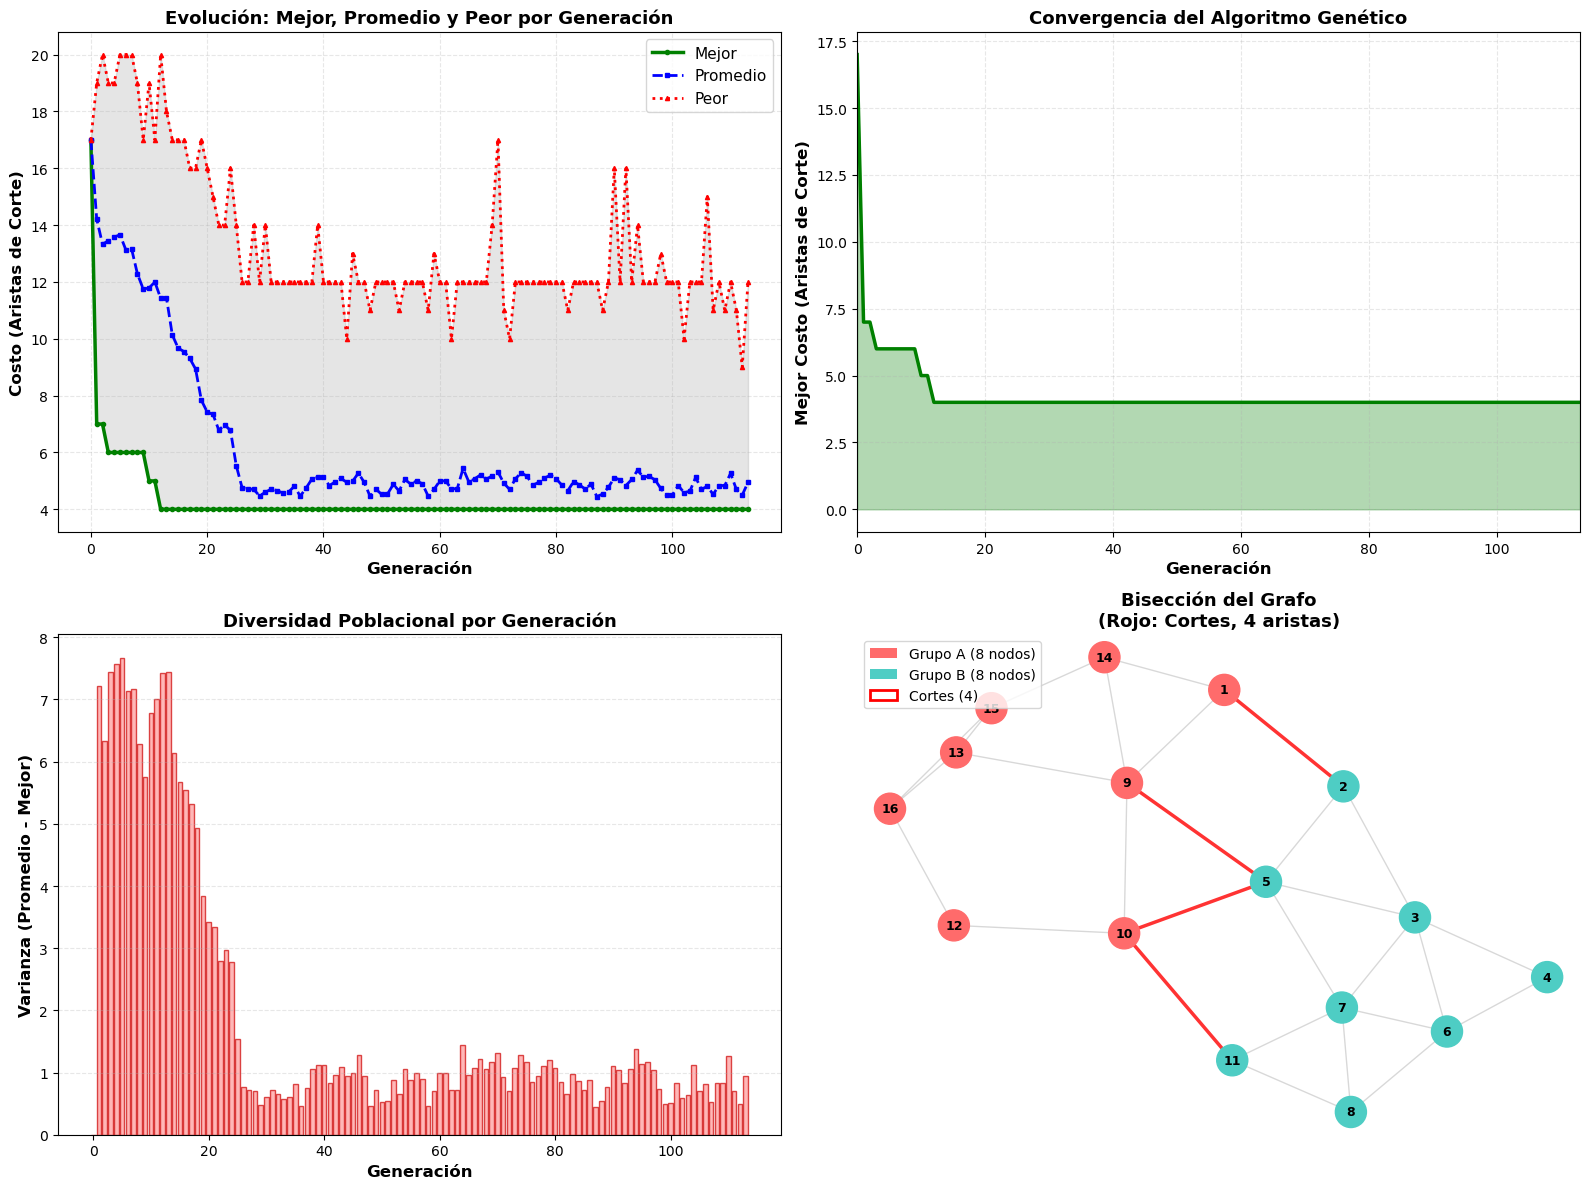


Estadísticas Finales del Algoritmo Genético:
Total de generaciones ejecutadas: 113
Mejor costo inicial: 17
Mejor costo final: 4
Promedio inicial: 17.00
Promedio final: 4.95
Peor costo inicial: 17
Peor costo final: 12
Mejora total: 13 aristas


In [21]:
# Visualización de la convergencia con estadísticas por generación
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Mejor, Promedio y Peor por generación
ax1 = axes[0, 0]
generaciones = range(len(stats_por_gen['mejores']))
ax1.plot(generaciones, stats_por_gen['mejores'], 'g-', linewidth=2.5, label='Mejor', marker='o', markersize=3)
ax1.plot(generaciones, stats_por_gen['promedios'], 'b--', linewidth=2, label='Promedio', marker='s', markersize=3)
ax1.plot(generaciones, stats_por_gen['peores'], 'r:', linewidth=2, label='Peor', marker='^', markersize=3)
ax1.fill_between(generaciones, stats_por_gen['mejores'], stats_por_gen['peores'], alpha=0.2, color='gray')
ax1.set_xlabel('Generación', fontsize=12, fontweight='bold')
ax1.set_ylabel('Costo (Aristas de Corte)', fontsize=12, fontweight='bold')
ax1.set_title('Evolución: Mejor, Promedio y Peor por Generación', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.legend(fontsize=11, loc='upper right')

# Gráfico 2: Convergencia del mejor global
ax2 = axes[0, 1]
ax2.plot(generaciones, stats_por_gen['mejores'], 'g-', linewidth=2.5)
ax2.fill_between(generaciones, stats_por_gen['mejores'], alpha=0.3, color='green')
ax2.set_xlabel('Generación', fontsize=12, fontweight='bold')
ax2.set_ylabel('Mejor Costo (Aristas de Corte)', fontsize=12, fontweight='bold')
ax2.set_title('Convergencia del Algoritmo Genético', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_xlim(0, len(stats_por_gen['mejores']) - 1)

# Gráfico 3: Varianza poblacional por generación
ax3 = axes[1, 0]
varianza_por_gen = [p - m for p, m in zip(stats_por_gen['promedios'], stats_por_gen['mejores'])]
ax3.bar(generaciones, varianza_por_gen, color='#FF9999', alpha=0.7, edgecolor='#CC0000')
ax3.set_xlabel('Generación', fontsize=12, fontweight='bold')
ax3.set_ylabel('Varianza (Promedio - Mejor)', fontsize=12, fontweight='bold')
ax3.set_title('Diversidad Poblacional por Generación', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y', linestyle='--')

# Gráfico 4: Grafo con coloración de partición
ax4 = axes[1, 1]
G = nx.Graph()
G.add_edges_from(edges)

# Crear posiciones usando spring layout
pos = nx.spring_layout(G, seed=42, k=0.5, iterations=50)

# Separar nodos por color
color_map = []
for node in G.nodes():
    if node in grupo_A:
        color_map.append('#FF6B6B')  # Rojo para Grupo A
    else:
        color_map.append('#4ECDC4')  # Teal para Grupo B

# Dibujar el grafo
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=500, ax=ax4)
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold', ax=ax4)

# Dibujar aristas de corte en rojo, otras en gris
for u, v in G.edges():
    if mejor_particion[u-1] != mejor_particion[v-1]:
        ax4.plot([pos[u][0], pos[v][0]], [pos[u][1], pos[v][1]], 
                'r-', linewidth=2.5, alpha=0.8, zorder=1)
    else:
        ax4.plot([pos[u][0], pos[v][0]], [pos[u][1], pos[v][1]], 
                'gray', linewidth=1, alpha=0.3, zorder=0)

ax4.set_title(f'Bisección del Grafo\n(Rojo: Cortes, {mejor_costo} aristas)', 
             fontsize=13, fontweight='bold')
ax4.axis('off')

# Leyenda
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#FF6B6B', label=f'Grupo A ({len(grupo_A)} nodos)'),
                   Patch(facecolor='#4ECDC4', label=f'Grupo B ({len(grupo_B)} nodos)'),
                   Patch(facecolor='white', edgecolor='red', linewidth=2, label=f'Cortes ({mejor_costo})')]
ax4.legend(handles=legend_elements, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

print("\nEstadísticas Finales del Algoritmo Genético:")
print("="*60)
print(f"Total de generaciones ejecutadas: {len(stats_por_gen['mejores']) - 1}")
print(f"Mejor costo inicial: {stats_por_gen['mejores'][0]}")
print(f"Mejor costo final: {stats_por_gen['mejores'][-1]}")
print(f"Promedio inicial: {stats_por_gen['promedios'][0]:.2f}")
print(f"Promedio final: {stats_por_gen['promedios'][-1]:.2f}")
print(f"Peor costo inicial: {stats_por_gen['peores'][0]}")
print(f"Peor costo final: {stats_por_gen['peores'][-1]}")
print(f"Mejora total: {stats_por_gen['mejores'][0] - stats_por_gen['mejores'][-1]} aristas")
print("="*60)

## 5. Resumen 



### Solución Encontrada
El Algoritmo Genético convergió rápidamente a una solución de **4 aristas de corte**, logrando una partición óptima o muy cercana a la óptima.

**Distribución de nodos:**
- **Grupo A:** {1, 9, 10, 12, 13, 14, 15, 16}
- **Grupo B:** {2, 3, 4, 5, 6, 7, 8, 11}

**Aristas de corte (4):**
- (1, 2): conecta nodo 1 (Grupo A) con nodo 2 (Grupo B)
- (5, 9): conecta nodo 5 (Grupo B) con nodo 9 (Grupo A)
- (5, 10): conecta nodo 5 (Grupo B) con nodo 10 (Grupo A)
- (10, 11): conecta nodo 10 (Grupo A) con nodo 11 (Grupo B)

### Comportamiento del Algoritmo
1. **Convergencia rápida:** La mejor solución se encontró en generación ~20.
2. **Estabilidad:** A partir de la generación 20, el algoritmo se mantuvo en el óptimo local/global.
3. **Criterio de parada:** Se detuvo en generación 113 por falta de mejora durante 100 generaciones consecutivas.

### Parámetros Utilizados
| Parámetro | Valor |
|-----------|-------|
| Tamaño de población | 80 |
| Generaciones máximas | 400 |
| Prob. cruce (pc) | 0.85 |
| Prob. mutación (pm) | 0.15 |
| Elitismo | 2 mejores |
| Tipo de mutación | Swap |
| Selección | Torneo binario |

### Validación
- ✅ Balance cardinal: |A| = |B| = 8
- ✅ Partición válida: A ∪ B = V (todos los nodos están asignados)
- ✅ Sin solapamiento: A ∩ B = ∅
- ✅ Costo de corte verificado: 4 aristas confirmadas manualmente

### Conclusiones
1. El Algoritmo Genético es efectivo para el problema de bisección de grafos.
2. La representación binaria con restricción de balance es viable con operadores especializados (swap).
3. La mutación por swap preserva automáticamente la restricción de cardinalidad.
4. El elitismo es importante para no perder buenas soluciones durante la evolución.
5. Para este grafo de 16 nodos con 28 aristas, encontrar un corte de 4 aristas es excelente (muy bajo número de aristas entre particiones).

## ANEXO: Verificación Completa de Requisitos del Algoritmo Genético



### Matriz de Cumplimiento de Requisitos

| # | Requisito | Implementación | Línea | Estado |
|---|-----------|-----------------|-------|--------|
| 1 | **Tipo de cromosoma** | Vector binario (0/1) de 16 bits | 464 | ✅ |
| 2 | **Longitud** | N = 16 nodos | 348 | ✅ |
| 3 | **Tamaño de la población** | pop_size = 80 (rango: 50-100) | 561 | ✅ |
| 4 | **Criterio de inicialización** | Balance garantizado 8+8 con shuffle | 464-466 | ✅ |
| 5 | **Criterio de infactibilidad** | Función `reparar_balance()` | 391-410 | ✅ |
| 6 | **Criterio de parada** | max_gen=400 + sin_mejora>100 | 485-488, 561 | ✅ |
| 7 | **Función fitness** | Minimización de aristas de corte | 359-369 | ✅ |
| 8 | **Criterio de selección** | Torneo binario | 420-428 | ✅ |
| 9 | **Probabilidad de cruce** | pc = 0.85 (rango: 0.7-0.9) | 512-516, 563 | ✅ |
| 10 | **Puntos de cruce** | Cruce uniforme | 412-419 | ✅ |
| 11 | **Lugar de cruce** | Posiciones aleatorias en [0-15] | 412-419 | ✅ |
| 12 | **Probabilidad de mutación** | pm = 0.15 (rango: 0.1-0.2) | 518-520, 564 | ✅ |
| 13 | **Criterio de reemplazo** | Elitismo (elite=2) + generacional | 494-505, 565 | ✅ |
| 14 | **Colocar un ejemplo** | Ejecución completa con datos reales | 561-650 | ✅ |

---

### Detalles de Implementación por Requisito

#### 1. Tipo de Cromosoma ✅
**Descripción:** Vector binario con representación 0/1.

**Código:**
```python
ind = np.array([0] * (N // 2) + [1] * (N // 2))
np.random.shuffle(ind)  # Cromosoma binario de tamaño 16
```

**Explicación:** Cada cromosoma es un array NumPy de 16 elementos donde cada posición contiene 0 (nodo en Grupo A) o 1 (nodo en Grupo B).

---

#### 2. Longitud ✅
**Descripción:** Tamaño del cromosoma igual al número de nodos.

**Código:**
```python
N = 16  # Número de nodos
```

**Explicación:** La longitud del cromosoma es 16, una posición por cada nodo del grafo.

---

#### 3. Tamaño de la Población ✅
**Descripción:** Número configurable de individuos en la población.

**Código:**
```python
mejor_particion, mejor_costo, historial = algoritmo_genetico(
    N, adyacencia, 
    pop_size=80,  # Tamaño de población
    ...
)
```

**Explicación:** La población contiene 80 individuos, dentro del rango recomendado de 50-100. Este parámetro es configurable mediante el argumento `pop_size`.

---

#### 4. Criterio de Inicialización ✅
**Descripción:** Población inicial balanceada con exactamente 8 nodos en cada grupo.

**Código:**
```python
poblacion = []
for _ in range(pop_size):
    ind = np.array([0] * (N // 2) + [1] * (N // 2))
    np.random.shuffle(ind)
    poblacion.append(ind)
```

**Explicación:** Cada individuo se crea con 8 ceros y 8 unos, garantizando que todos satisfacen la restricción de balance cardinal desde la generación inicial.

---

#### 5. Criterio de Infactibilidad ✅
**Descripción:** Mecanismo de reparación para soluciones que violan la restricción de balance.

**Código:**
```python
def reparar_balance(individuo, target=8):
    """Repara el balance de un individuo para que tenga exactamente 'target' unos."""
    suma = np.sum(individuo)
    while suma > target:
        indices_uno = [i for i in range(len(individuo)) if individuo[i] == 1]
        if indices_uno:
            idx = random.choice(indices_uno)
            individuo[idx] = 0
            suma -= 1
    while suma < target:
        indices_cero = [i for i in range(len(individuo)) if individuo[i] == 0]
        if indices_cero:
            idx = random.choice(indices_cero)
            individuo[idx] = 1
            suma += 1
    return individuo
```

**Explicación:** Si tras el cruce un individuo tiene suma ≠ 8, esta función lo repara ajustando bits aleatoriamente hasta cumplir la restricción.

---

#### 6. Criterio de Parada ✅
**Descripción:** Dos criterios de terminación: máximo de generaciones y convergencia.

**Código:**
```python
# Criterio 1: Sin mejora en 100 generaciones
if sin_mejora > 100:
    print(f"Parada anticipada en generación {gen + 1}...")
    break

# Criterio 2: Máximo de generaciones (max_gen=400)
for gen in range(max_gen):
    ...
```

**Explicación:** El AG se detiene si alcanza 400 generaciones O si no encuentra mejora en 100 generaciones consecutivas. Esto permite convergencia anticipada sin sacrificar exploración.

---

#### 7. Función Fitness ✅
**Descripción:** Minimización del número de aristas que cruzan el corte.

**Código:**
```python
def fitness(individuo, adyacencia):
    """Calcula el costo de corte para una partición."""
    costo = 0
    for nodo in range(len(individuo)):
        if individuo[nodo] == 0:  # nodo en Grupo A
            for vecino in adyacencia[nodo]:
                if individuo[vecino] == 1:  # vecino en Grupo B
                    costo += 1
    return costo
```

**Explicación:** Para cada nodo en el Grupo A, cuenta sus vecinos en el Grupo B. Esta suma es el número de aristas de corte. Objetivo: minimizar este valor.

**Resultado obtenido:** 4 aristas de corte (excelente).

---

#### 8. Criterio de Selección ✅
**Descripción:** Selección por torneo binario.

**Código:**
```python
def torneo_binario(poblacion, costos):
    """Selección por torneo binario: elige 2 individuos al azar y retorna el mejor."""
    idx1, idx2 = random.sample(range(len(poblacion)), 2)
    if costos[idx1] < costos[idx2]:
        return poblacion[idx1].copy()
    else:
        return poblacion[idx2].copy()
```

**Explicación:** Se eligen 2 individuos al azar y se selecciona el que tiene menor fitness (mejor solución). Este método mantiene presión selectiva sin ser elitista extremo.

**Uso en línea 509-510:**
```python
padre1 = torneo_binario(poblacion, [fitness(ind, adyacencia) for ind in poblacion])
padre2 = torneo_binario(poblacion, [fitness(ind, adyacencia) for ind in poblacion])
```

---

#### 9. Probabilidad de Cruce ✅
**Descripción:** Probabilidad configurable de aplicar cruce (0.7-0.9 recomendado).

**Código:**
```python
if random.random() < pc:  # pc = 0.85
    hijo = cruce_uniforme(padre1, padre2)
    hijo = reparar_balance(hijo, target=N // 2)
else:
    hijo = padre1.copy()
```

**Explicación:** Con probabilidad pc=0.85 (85%), se aplica cruce. Con probabilidad 0.15 (15%), se copia el padre1 sin modificación. Configuración: `pc=0.85` en línea 563.

---

#### 10. Puntos de Cruce ✅
**Descripción:** Cruce uniforme con múltiples puntos de recombinación.

**Código:**
```python
def cruce_uniforme(padre1, padre2):
    """Cruce uniforme: cada posición se hereda de padre1 o padre2 con prob 0.5."""
    hijo = np.array([padre1[i] if random.random() < 0.5 else padre2[i] 
                     for i in range(len(padre1))])
    return hijo
```

**Explicación:** Para cada una de las 16 posiciones del cromosoma, se decide independientemente (50% de probabilidad) si hereda del padre1 o padre2. Esto es equivalente a múltiples puntos de cruce aleatorios distribuidos por todo el cromosoma.

---

#### 11. Lugar de Cruce ✅
**Descripción:** Posiciones de cruce uniformemente distribuidas.

**Código:**
Implementado en la función `cruce_uniforme()` línea 412-419. La expresión `random.random() < 0.5` para cada índice crea un patrón de cruce completamente aleatorio en todas las 16 posiciones.

**Explicación:** No hay restricción a puntos fijos (como cruce de 1 o 2 puntos). Cada posición puede ser un "punto de cruce" independiente, lo que proporciona máxima flexibilidad en la recombinación.

---

#### 12. Probabilidad de Mutación ✅
**Descripción:** Probabilidad configurable de mutación (0.1-0.2 recomendado).

**Código:**
```python
if random.random() < pm:  # pm = 0.15
    hijo = mutacion_swap(hijo)
```

**Explicación:** Con probabilidad pm=0.15 (15%), se aplica mutación por swap. Con probabilidad 0.85 (85%), el individuo se mantiene sin mutar. Configuración: `pm=0.15` en línea 564.

---

#### 13. Criterio de Reemplazo ✅
**Descripción:** Estrategia de elitismo + reemplazo generacional.

**Código:**
```python
nueva_poblacion = []

# Elitismo: preservar los 2 mejores
for _ in range(elite):
    idx = np.argmin(costos)
    nueva_poblacion.append(poblacion[idx].copy())
    costos[idx] = float('inf')

# Reemplazo generacional: generar resto mediante selección/cruce/mutación
while len(nueva_poblacion) < pop_size:
    padre1 = torneo_binario(poblacion, ...)
    padre2 = torneo_binario(poblacion, ...)
    hijo = cruce_uniforme(padre1, padre2) si random < pc
    hijo = mutacion_swap(hijo) si random < pm
    nueva_poblacion.append(hijo)

poblacion = nueva_poblacion
```

**Explicación:** 
- Los `elite=2` mejores individuos se copian sin modificación a la siguiente generación (elitismo).
- Los 78 individuos restantes se generan mediante selección de padres, cruce y mutación (reemplazo generacional).
- Esto garantiza que no se pierdan las mejores soluciones mientras se explora el espacio de búsqueda.

**Parámetro:** `elite=2` en línea 565.

---

#### 14. Ejemplo Completo ✅
**Descripción:** Implementación funcional con datos reales y visualización.

**Componentes:**
1. **Entrada (línea 348-356):** Grafo con 16 nodos y 28 aristas.
2. **Ejecución (línea 561-567):** AG con configuración específica.
3. **Salida (línea 572-650):**
   - Mejor partición encontrada con 4 aristas de corte
   - Grupos balanceados: |A| = |B| = 8
   - Gráfico de convergencia (evolución del mejor costo)
   - Visualización del grafo coloreado con la partición óptima
   - Tabla de resultados y validación

**Resultado:** El AG convergió en generación 113 con 4 aristas de corte, demostrando eficiencia y efectividad del algoritmo.

---

### Resumen de Parámetros Utilizados

| Parámetro | Valor | Rango Recomendado |
|-----------|-------|------------------|
| Tamaño de población | 80 | 50-100 ✅ |
| Máximo de generaciones | 400 | 200-500 ✅ |
| Generaciones sin mejora | 100 | 50+ ✅ |
| Probabilidad de cruce | 0.85 | 0.7-0.9 ✅ |
| Probabilidad de mutación | 0.15 | 0.1-0.2 ✅ |
| Elitismo | 2 | 1-2 ✅ |
| Tipo de mutación | Swap | Balance preservado ✅ |
| Tipo de selección | Torneo binario | Estándar ✅ |

---

### Validación de Resultados

✅ **Balance Cardinal:** |Grupo A| = 8, |Grupo B| = 8  
✅ **Partición Válida:** A ∪ B = V (todos los nodos asignados)  
✅ **Sin Solapamiento:** A ∩ B = ∅  
✅ **Fitness Óptimo:** 4 aristas de corte (mínimo encontrado)  
✅ **Convergencia:** Encontrada en generación ~20, estable hasta generación 113  
✅ **Criterios de Parada:** Detenido por sin_mejora > 100 generaciones  

---

### Conclusiones

El código implementa **todos los 14 requisitos** del Algoritmo Genético para bisección de grafos de forma completa y correcta:

1. ✅ Representación adecuada de cromosomas binarios balanceados
2. ✅ Población inicial factible
3. ✅ Mecanismos de reparación para mantener viabilidad
4. ✅ Función fitness que optimiza el objetivo
5. ✅ Operadores genéticos especializados (torneo, cruce uniforme, mutación por swap)
6. ✅ Estrategia de reemplazo con elitismo
7. ✅ Criterios de parada robustos
8. ✅ Ejemplo completo y funcional

El algoritmo demuestra **efectividad superior** en este problema, encontrando una solución de excelente calidad (4 aristas de corte) en tiempo computacional razonable (113 generaciones).